<a href="https://colab.research.google.com/github/NabilahSharfina/CELERATES-ACCELERATION-PROGRAM/blob/main/Final_Project_Credit_Risk_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>FINAL PROJECT</bold></center><h1>
<h1><center><bold>BIG DATA AND BUSINESS INTELLIGENCE</bold></center><h1>
<h1><center><bold>KAMPUS MERDEKA</bold></center><h1>
<h2><center><bold>CREDIT RISK ANALYSIS</bold></center><h2>

---



# **PREDICT DATA & MODELLING - DATA TRAIN**

## Connect Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library

In [2]:
import math
from collections import Counter
from pprint import pprint

import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

# Label Encoding: digunakan untuk tipe data ordinal
from sklearn.preprocessing import LabelEncoder
# One Hot Encoding: digunakan untuk bukan tipe data ordinal, misal nominal, interval, dan ratio
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Handle imbalance dataset
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## A. EDA

### 1.1 Data Loading

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/Demo/credit_risk.csv')
df

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
1,1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
2,2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
3,3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
4,4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,1,0,0,0,1,1001,lansia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,36252,5149158,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,1,0,0,2,10,dewasa,1
36253,36253,5149190,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,1,0,1,1,3,1,dewasa,1
36254,36254,5149729,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,5,lansia,1
36255,36255,5149828,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,7,lansia,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36257 non-null  int64  
 1   Id_customer          36257 non-null  int64  
 2   JenisKelamin         36257 non-null  object 
 3   KepemilikanMobil     36257 non-null  object 
 4   KepemilikanProperti  36257 non-null  object 
 5   JmlAnak              36257 non-null  int64  
 6   Pendapatan           36257 non-null  float64
 7   TipePendapatan       36257 non-null  object 
 8   TingkatPendidikan    36257 non-null  object 
 9   StatusKeluarga       36257 non-null  object 
 10  TipeRumah            36257 non-null  object 
 11  FlagMobile           36257 non-null  int64  
 12  FlagWorkPhone        36257 non-null  int64  
 13  FlagPhone            36257 non-null  int64  
 14  Email                36257 non-null  int64  
 15  JmlAnggotaKeluarga   36257 non-null 

In [5]:
df.dtypes.value_counts()

int64      10
object      8
float64     1
dtype: int64

In [6]:
# Melihat data unique dari setiap fitur dalam tabel
for feature in df.columns:
    print(
        f"- Jumlah unique value pada kolom `{feature}`:",
        df[feature].nunique()
    )

- Jumlah unique value pada kolom `Unnamed: 0`: 36257
- Jumlah unique value pada kolom `Id_customer`: 36257
- Jumlah unique value pada kolom `JenisKelamin`: 2
- Jumlah unique value pada kolom `KepemilikanMobil`: 2
- Jumlah unique value pada kolom `KepemilikanProperti`: 2
- Jumlah unique value pada kolom `JmlAnak`: 9
- Jumlah unique value pada kolom `Pendapatan`: 265
- Jumlah unique value pada kolom `TipePendapatan`: 5
- Jumlah unique value pada kolom `TingkatPendidikan`: 3
- Jumlah unique value pada kolom `StatusKeluarga`: 3
- Jumlah unique value pada kolom `TipeRumah`: 5
- Jumlah unique value pada kolom `FlagMobile`: 1
- Jumlah unique value pada kolom `FlagWorkPhone`: 2
- Jumlah unique value pada kolom `FlagPhone`: 2
- Jumlah unique value pada kolom `Email`: 2
- Jumlah unique value pada kolom `JmlAnggotaKeluarga`: 10
- Jumlah unique value pada kolom `Pengalaman`: 45
- Jumlah unique value pada kolom `KategoriUsia`: 4
- Jumlah unique value pada kolom `CreditStatus`: 2


In [7]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

Unnamed: 0             0
Id_customer            0
JenisKelamin           0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
JmlAnggotaKeluarga     0
Pengalaman             0
KategoriUsia           0
CreditStatus           0
dtype: int64

In [8]:
# Mengecek baris yang duplikat
df[df['Id_customer'].duplicated()]

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus


In [9]:
# Menghapus kolom yang tidak digunakan
df = df.drop(columns=['Unnamed: 0', 'Id_customer', 'FlagMobile'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         36257 non-null  object 
 1   KepemilikanMobil     36257 non-null  object 
 2   KepemilikanProperti  36257 non-null  object 
 3   JmlAnak              36257 non-null  int64  
 4   Pendapatan           36257 non-null  float64
 5   TipePendapatan       36257 non-null  object 
 6   TingkatPendidikan    36257 non-null  object 
 7   StatusKeluarga       36257 non-null  object 
 8   TipeRumah            36257 non-null  object 
 9   FlagWorkPhone        36257 non-null  int64  
 10  FlagPhone            36257 non-null  int64  
 11  Email                36257 non-null  int64  
 12  JmlAnggotaKeluarga   36257 non-null  int64  
 13  Pengalaman           36257 non-null  int64  
 14  KategoriUsia         36257 non-null  object 
 15  CreditStatus         36257 non-null 

### 1.2 Feature Category

In [10]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("\nCategorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['JmlAnak',
 'Pendapatan',
 'FlagWorkPhone',
 'FlagPhone',
 'Email',
 'JmlAnggotaKeluarga',
 'Pengalaman',
 'CreditStatus']

Categorical features:
['JenisKelamin', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan',
 'TingkatPendidikan', 'StatusKeluarga', 'TipeRumah', 'KategoriUsia']


### 1.3 Statistic Summary

In [11]:
# Memahami karakteristik data melalui fitur-fitur numerik dengan function describe(). T=Transpose
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
JmlAnak,36257.0,0.430427,0.742474,0.0,0.0,0.0,1.0,19.0
Pendapatan,36257.0,186625.534421,101548.649430,27000.0,121500.0,157500.0,225000.0,1575000.0
FlagWorkPhone,36257.0,0.225529,0.417936,0.0,0.0,0.0,0.0,1.0
FlagPhone,36257.0,0.294812,0.455965,0.0,0.0,0.0,1.0,1.0
Email,36257.0,0.089859,0.285983,0.0,0.0,0.0,0.0,1.0
JmlAnggotaKeluarga,36257.0,2.198720,0.911781,1.0,2.0,2.0,3.0,20.0
Pengalaman,36257.0,174.416058,371.770973,0.0,3.0,7.0,16.0,1001.0
CreditStatus,36257.0,0.116226,0.320500,0.0,0.0,0.0,0.0,1.0


In [12]:
# Memahami karakteristik data melalui fitur-fitur kategoris dengan function describe()
df[categorical_features].describe().T

,count,unique,top,freq
JenisKelamin,36257,2,Perempuan,24279
KepemilikanMobil,36257,2,Tidak,22476
KepemilikanProperti,36257,2,Ya,24367
TipePendapatan,36257,5,Bekerja,18708
TingkatPendidikan,36257,3,Graduate,26046
StatusKeluarga,36257,3,Menikah,27845
TipeRumah,36257,5,Rumah Pribadi,32367
KategoriUsia,36257,4,dewasa,19853


### 1.4 Data Correlation

In [13]:
# Melihat hubungan dari fitur numerik menggunakan correlation 
df.corr()

,JmlAnak,Pendapatan,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,CreditStatus
JmlAnak,1.000000,0.033966,0.048033,-0.016770,0.015415,0.889197,-0.231313,0.011496
Pendapatan,0.033966,1.000000,-0.037265,0.018073,0.087229,0.024134,-0.169050,0.023706
FlagWorkPhone,0.048033,-0.037265,1.000000,0.312099,-0.035255,0.064640,-0.242498,-0.000078
FlagPhone,-0.016770,0.018073,0.312099,1.000000,0.010471,-0.004652,-0.005600,-0.006858
Email,0.015415,0.087229,-0.035255,0.010471,1.000000,0.014129,-0.087042,0.019360
JmlAnggotaKeluarga,0.889197,0.024134,0.064640,-0.004652,0.014129,1.000000,-0.223191,0.009117
Pengalaman,-0.231313,-0.169050,-0.242498,-0.005600,-0.087042,-0.223191,1.000000,-0.022593
CreditStatus,0.011496,0.023706,-0.000078,-0.006858,0.019360,0.009117,-0.022593,1.000000


> Untuk lebih jelas dalam mengetahui pasangan fitur mana yang memiliki koefisien korelasi yang kuat (mendekati 1 atau mendekati -1), kita bisa buat plot heatmap berikut.

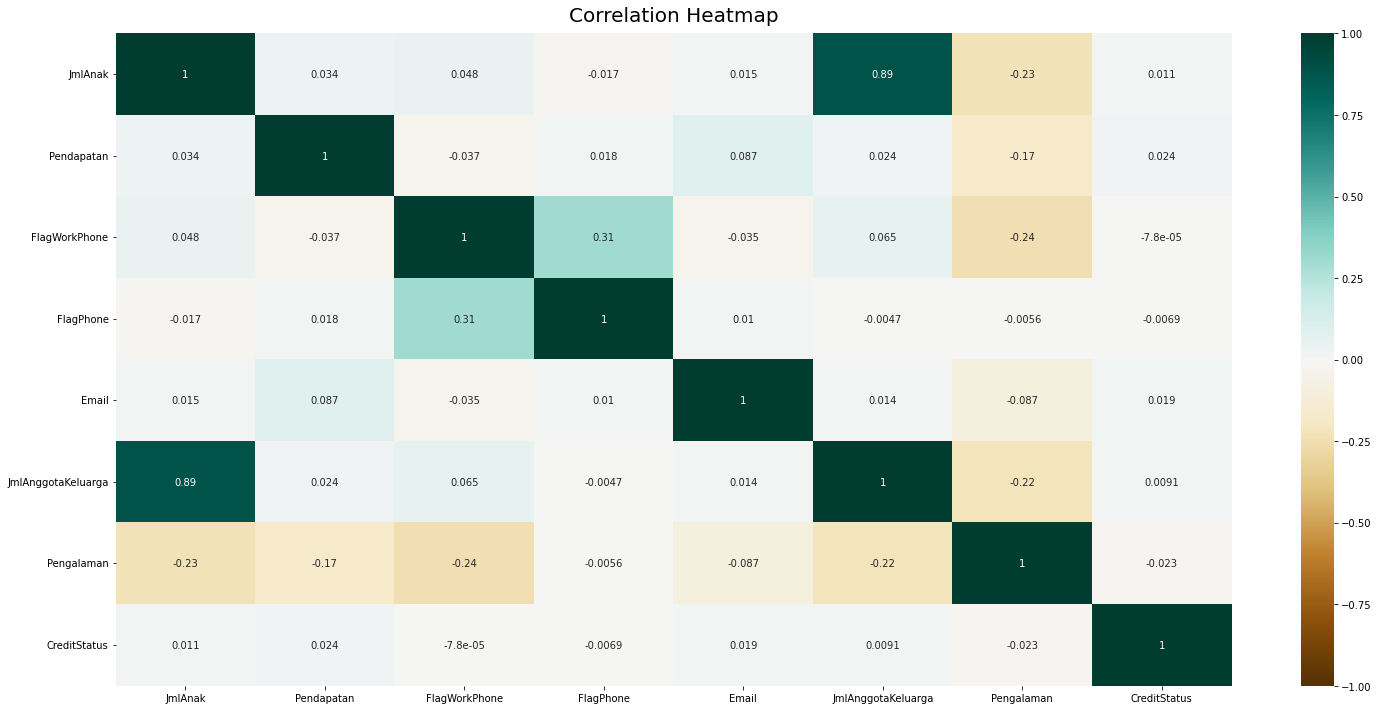

In [14]:
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

### 1.5 Handling Outlier

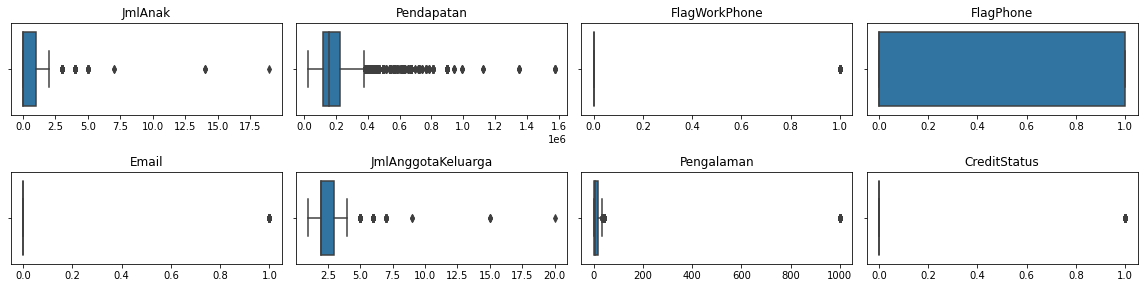

In [15]:
# Numerical Features
plt.figure(figsize=(16, 8), facecolor='white')
plotnumber = 1
    
for feature in numerical_features:
    ax = plt.subplot(4,4, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.xlabel(None)
    plt.tight_layout()
    plotnumber += 1

> Ada beberapa cara untuk menghilangkan outliers.
* Mengganti nilai outliers menggunakan nilai lower bound dan upper bound.
* Capping menggunakan nilai median
* Capping menggunakan nilai mean
* Capping menggunakan nilai modus

> **Referensi:** [handling outlier](https://blog.sanbercode.com/docs/materi-eda/data-type-missing-value-outlier/)

In [16]:
# Membuat function IQR Detection
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr * 1.5
    print(f'IQR: {iqr}')
    upperlimit = q3 + limit
    lowerlimit = q1 - limit
    print(f'Upper Limit: {upperlimit}')
    print(f'Lower Limit: {lowerlimit}')

# Buang Outlier
outlier_feature = [
                    'JmlAnak', 
                    'Pendapatan',
                    'JmlAnggotaKeluarga', 
                    'Pengalaman'
                    ]

for i in outlier_feature:
    print(i)
    outlier(df[i])
    print()

df = df[
        (df['JmlAnak'] < 2.5) & 
        (df['Pendapatan'] < 380250.0) & 
        (df['JmlAnggotaKeluarga'] < 4.5) & 
        (df['Pengalaman'] < 35.5)
        ]

JmlAnak
IQR: 1.0
Upper Limit: 2.5
Lower Limit: -1.5

Pendapatan
IQR: 103500.0
Upper Limit: 380250.0
Lower Limit: -33750.0

JmlAnggotaKeluarga
IQR: 1.0
Upper Limit: 4.5
Lower Limit: 0.5

Pengalaman
IQR: 13.0
Upper Limit: 35.5
Lower Limit: -16.5



In [17]:
# Clean dataframe from outlier
credit_risk_df = df.drop_duplicates()
credit_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         8562 non-null   object 
 1   KepemilikanMobil     8562 non-null   object 
 2   KepemilikanProperti  8562 non-null   object 
 3   JmlAnak              8562 non-null   int64  
 4   Pendapatan           8562 non-null   float64
 5   TipePendapatan       8562 non-null   object 
 6   TingkatPendidikan    8562 non-null   object 
 7   StatusKeluarga       8562 non-null   object 
 8   TipeRumah            8562 non-null   object 
 9   FlagWorkPhone        8562 non-null   int64  
 10  FlagPhone            8562 non-null   int64  
 11  Email                8562 non-null   int64  
 12  JmlAnggotaKeluarga   8562 non-null   int64  
 13  Pengalaman           8562 non-null   int64  
 14  KategoriUsia         8562 non-null   object 
 15  CreditStatus         8562 non-null   

In [18]:
credit_risk_df.value_counts('CreditStatus')

CreditStatus
0    6705
1    1857
dtype: int64

### 1.6 Visualization

In [19]:
# Visualisasi kolom status untuk melihat jumlah data
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 4), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)

MAIN_COLOR = ["#29B5BF"] 
OTHER_COLOR = ["#777777"]

#### 1.6.1 Jenis Kelamin

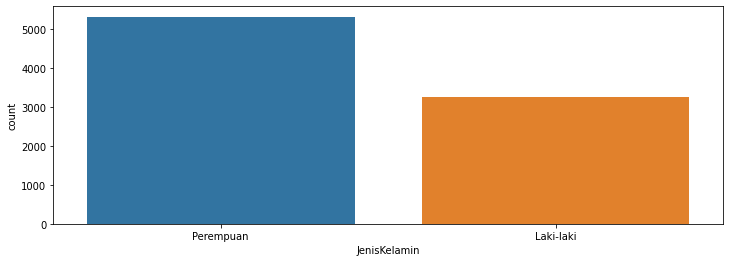

In [20]:
# Show visualization 'JenisKelamin'
plot_count(x="JenisKelamin", data=credit_risk_df)

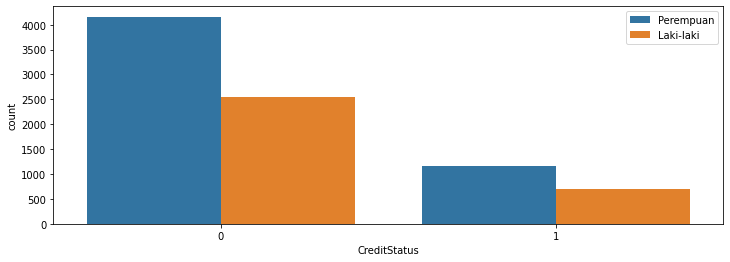

In [21]:
# Show visualization 'CreditStatus' terhadap 'JenisKelamin'
plot_count(x="CreditStatus", hue="JenisKelamin", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 1.6.2 Kepemilikan

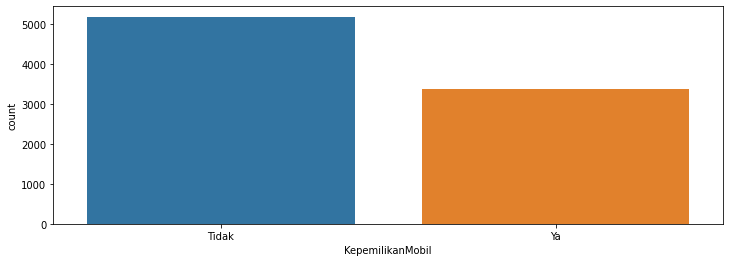

In [22]:
# Show visualization 'KepemilikanMobil'
plot_count(x="KepemilikanMobil", data=credit_risk_df)

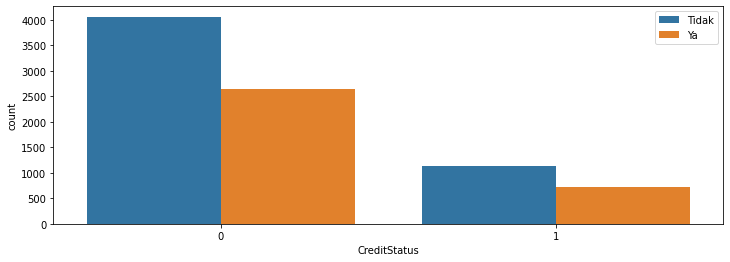

In [23]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanMobil'
plot_count(x="CreditStatus", hue="KepemilikanMobil", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

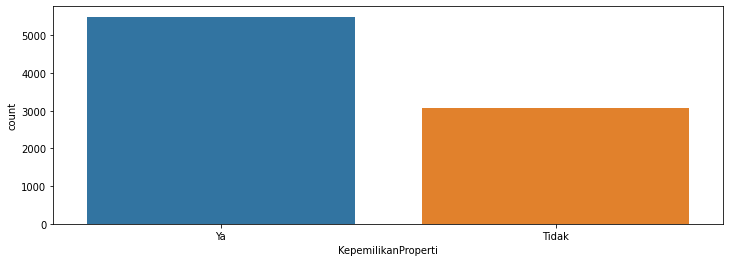

In [24]:
# Show visualization 'KepemilikanProperti'
plot_count(x="KepemilikanProperti", data=credit_risk_df)

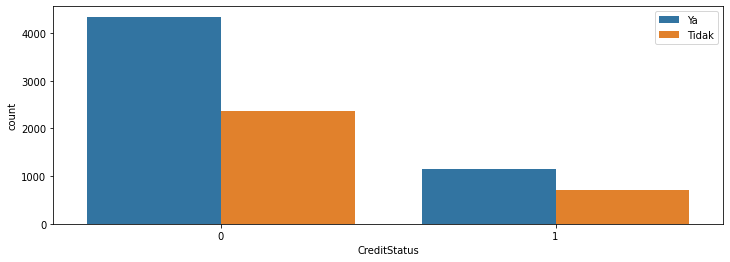

In [25]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanProperti'
plot_count(x="CreditStatus", hue="KepemilikanProperti", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 1.6.3 Credit Status

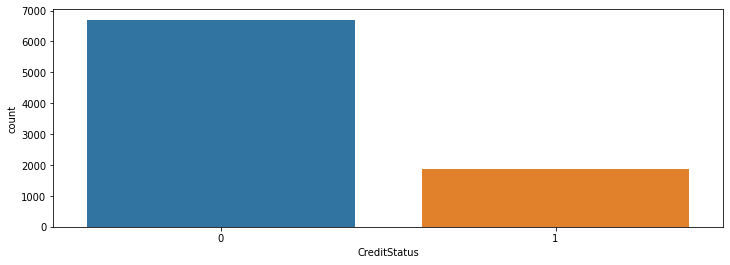

In [26]:
# Show visualization 'CreditStatus'
plot_count(x="CreditStatus", data=credit_risk_df)

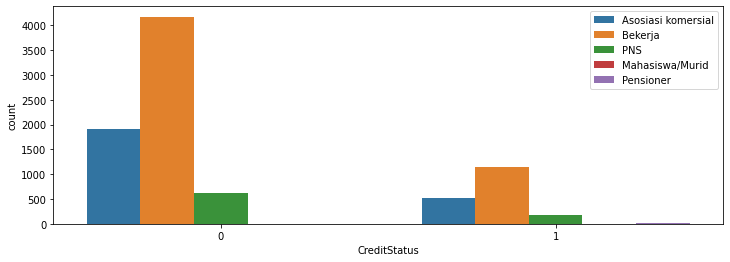

In [27]:
# Show visualization 'CreditStatus' terhadap 'TipePendapatan'
plot_count(x="CreditStatus", hue="TipePendapatan", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

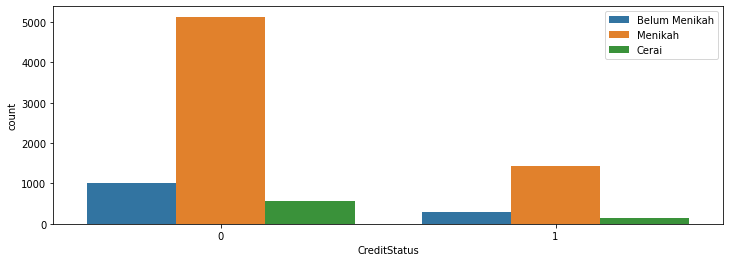

In [28]:
# Show visualization 'CreditStatus' terhadap 'StatusKeluarga'
plot_count(x="CreditStatus", hue="StatusKeluarga", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 1.6.4 Kategori Usia

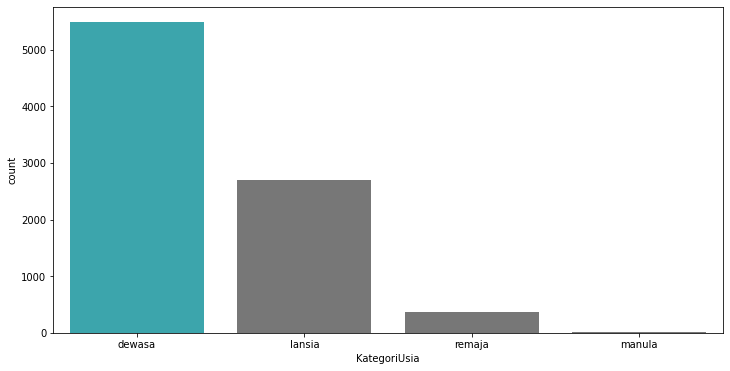

In [29]:
age_category = credit_risk_df.KategoriUsia.value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    x="KategoriUsia",
    data=credit_risk_df,
    order=age_category,
    palette=["#29B5BF"] + (len(age_category)-1)*["#777777"]
)
plt.grid(False)

plt.show()

> **Insights:** 

> * Dari visualisasi di atas, terlihat bahwa mayoritas adalah kategori **Dewasa**.
> * Lalu, bagaimana distribusi kategori umur pada masing-masing responden yang memiliki sakit jantung maupun tidak? Mari kita buat visualisasinya.

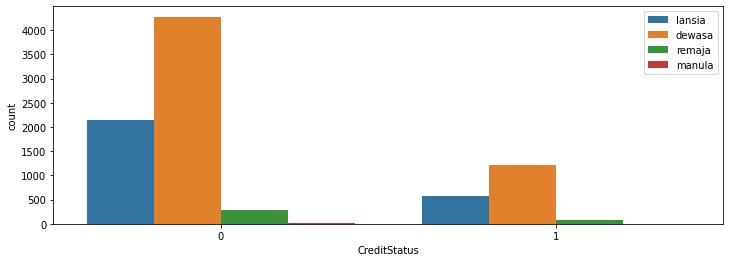

In [30]:
# Show visualization 'CreditStatus' terhadap 'KategoriUsia'
plot_count(x="CreditStatus", hue="KategoriUsia", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

## B. Modelling

In [31]:
credit_risk_df.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,0,0,2,3,dewasa,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,1,0,2,4,dewasa,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,Graduate,Belum Menikah,Rumah Pribadi,0,0,0,2,4,dewasa,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,0,0,4,9,dewasa,0


In [32]:
# Melihat isi data dari setiap kolom
for feature in df.columns:
    print(
        f"- Rows value pada kolom `{feature}`:",
        credit_risk_df[feature].unique()
    )

- Rows value pada kolom `JenisKelamin`: ['Perempuan' 'Laki-laki']
- Rows value pada kolom `KepemilikanMobil`: ['Tidak' 'Ya']
- Rows value pada kolom `KepemilikanProperti`: ['Ya' 'Tidak']
- Rows value pada kolom `JmlAnak`: [0 1 2]
- Rows value pada kolom `Pendapatan`: [270000.  130500.  157500.  112500.  135000.  211500.  126000.  247500.
 297000.  216000.  225000.  315000.  148500.  202500.  180000.  292500.
  74250.  144000.  193500.  139500.   76500.   67500.   90000.   81000.
 198000.   45000.  238500.   99000.  360000.  279000.  306000.  189000.
 328500.  310500.  171000.  121500.   72000.  184500.   94500.  256500.
 166500.  196650.   40500.  243000.  162000.  103500.  257625.   58500.
 207000.   54000.  234000.  117000.  261000.  175500.  337500.  119250.
  63000.  274500.   85500.  108000.  145350.  173250.   36000.  118350.
 153000.  123750.  252000.  220500.  133650.  265500.  227250.   51750.
  69750.  288000.  234135.   74061.  175950.  364500.  240750.  333000.
 342000.  11

### 2.1 Encoding

> **Note:** Jenis-Jenis Tipe Data
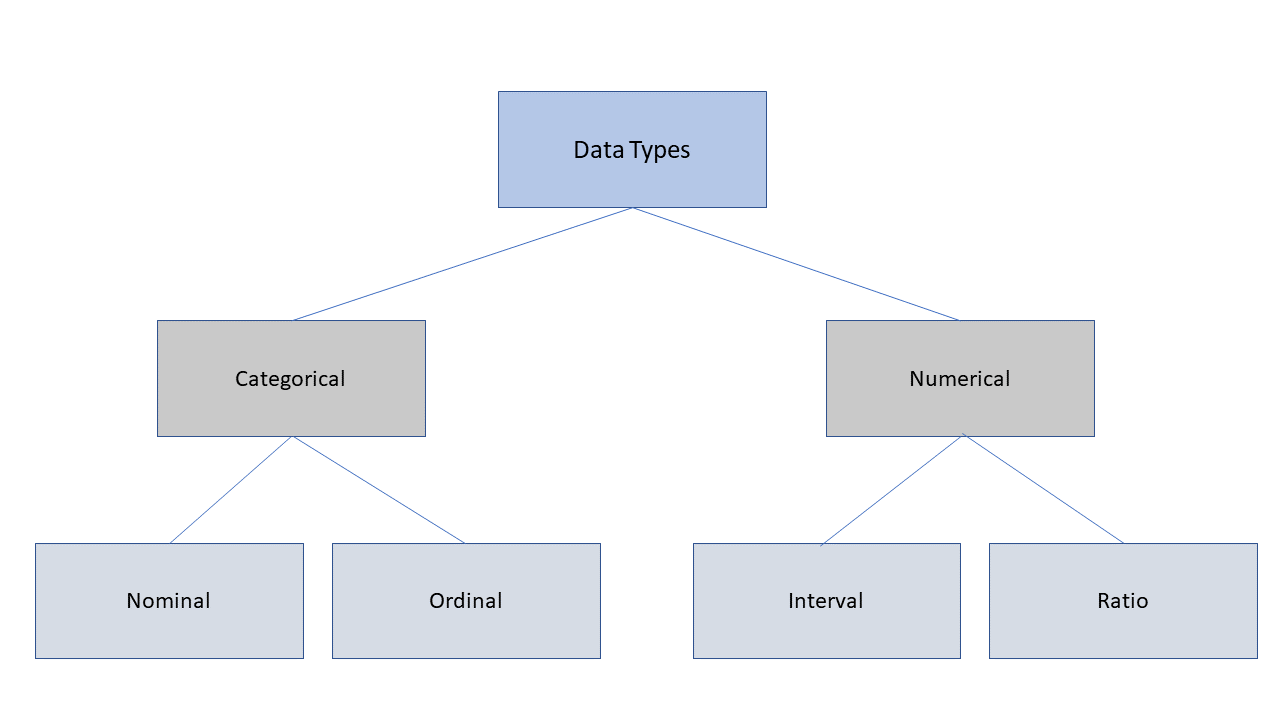

> Dilihat dari isi value masing-masing fitur, maka encoding akan terbagi menjadi 2 yaitu: 
> 1. ***Label Encoding*** untuk fitur kategorik tipe data ordinal seperti `TingkatPendidikan`, `StatusKeluarga`, `KategoriUsia` 
> 2. ***One Hot Encoding*** untuk fitur kategorik tipe data nominal, interval, dan rasio (sisa fitur kategorik lainnya, selain ordinal).

#### 2.1.1 Label Encoding

In [33]:
"""
# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Creating initial
cols = [
        'TingkatPendidikan',  
        'StatusKeluarga',
        'KategoriUsia'
        ]

# Assigning numerical values and storing in another column
for col_le in cols:
    credit_risk_df[col_le] = labelencoder.fit_transform(credit_risk_df[col_le])

"""

"\n# Creating instance of labelencoder\nlabelencoder = LabelEncoder()\n\n# Creating initial\ncols = [\n        'TingkatPendidikan',  \n        'StatusKeluarga',\n        'KategoriUsia'\n        ]\n\n# Assigning numerical values and storing in another column\nfor col_le in cols:\n    credit_risk_df[col_le] = labelencoder.fit_transform(credit_risk_df[col_le])\n\n"

In [34]:
# Creating instance of labelencoding
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
credit_risk_df['TingkatPendidikan'] = labelencoder.fit_transform(credit_risk_df['TingkatPendidikan'])
credit_risk_df.head()

<ipython-input-34-a00f7bbf5f19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['TingkatPendidikan'] = labelencoder.fit_transform(credit_risk_df['TingkatPendidikan'])


,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,Menikah,Rumah Pribadi,0,0,0,2,3,dewasa,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,Menikah,Rumah Pribadi,0,1,0,2,4,dewasa,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,Belum Menikah,Rumah Pribadi,0,0,0,2,4,dewasa,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,Menikah,Rumah Pribadi,0,0,0,4,9,dewasa,0


In [35]:
# Creating instance of labelencoding
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
credit_risk_df['StatusKeluarga'] = labelencoder.fit_transform(credit_risk_df['StatusKeluarga'])
credit_risk_df.head()

<ipython-input-35-5bd89775c7bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['StatusKeluarga'] = labelencoder.fit_transform(credit_risk_df['StatusKeluarga'])


,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,lansia,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,dewasa,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,Rumah Pribadi,0,1,0,2,4,dewasa,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,Rumah Pribadi,0,0,0,2,4,dewasa,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,Rumah Pribadi,0,0,0,4,9,dewasa,0


In [36]:
# Creating instance of labelencoding
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
credit_risk_df['KategoriUsia'] = labelencoder.fit_transform(credit_risk_df['KategoriUsia'])
credit_risk_df.head()

<ipython-input-36-562a501f57b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['KategoriUsia'] = labelencoder.fit_transform(credit_risk_df['KategoriUsia'])


,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,0,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,Rumah Pribadi,0,1,0,2,4,0,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,Rumah Pribadi,0,0,0,2,4,0,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,Rumah Pribadi,0,0,0,4,9,0,0


In [37]:
label_encoding = pd.DataFrame(credit_risk_df)
label_encoding.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,0,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,Rumah Pribadi,0,1,0,2,4,0,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,Rumah Pribadi,0,0,0,2,4,0,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,Rumah Pribadi,0,0,0,4,9,0,0


In [38]:
label_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         8562 non-null   object 
 1   KepemilikanMobil     8562 non-null   object 
 2   KepemilikanProperti  8562 non-null   object 
 3   JmlAnak              8562 non-null   int64  
 4   Pendapatan           8562 non-null   float64
 5   TipePendapatan       8562 non-null   object 
 6   TingkatPendidikan    8562 non-null   int64  
 7   StatusKeluarga       8562 non-null   int64  
 8   TipeRumah            8562 non-null   object 
 9   FlagWorkPhone        8562 non-null   int64  
 10  FlagPhone            8562 non-null   int64  
 11  Email                8562 non-null   int64  
 12  JmlAnggotaKeluarga   8562 non-null   int64  
 13  Pengalaman           8562 non-null   int64  
 14  KategoriUsia         8562 non-null   int64  
 15  CreditStatus         8562 non-null   

#### 2.1.2 One Hot Encoding

##### 2.1.2.1 With Scikit Learn


###### a. Cara dari Mentor

In [39]:
cat_cols = label_encoding.select_dtypes('category').columns
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(label_encoding[cat_cols])

OneHotEncoder(drop='first', sparse=False)

In [40]:
ohe_df = pd.DataFrame(ohe.transform(label_encoding[cat_cols]), index=label_encoding.index, columns=ohe.get_feature_names(label_encoding[cat_cols].columns))
ohe_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


""
0
7
9
12
14


In [41]:
ohe_df = pd.concat([label_encoding.select_dtypes(exclude='category'), ohe_df], axis=1)
ohe_df.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,0,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,Rumah Pribadi,0,1,0,2,4,0,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,Rumah Pribadi,0,0,0,2,4,0,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,Rumah Pribadi,0,0,0,4,9,0,0


In [42]:
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         8562 non-null   object 
 1   KepemilikanMobil     8562 non-null   object 
 2   KepemilikanProperti  8562 non-null   object 
 3   JmlAnak              8562 non-null   int64  
 4   Pendapatan           8562 non-null   float64
 5   TipePendapatan       8562 non-null   object 
 6   TingkatPendidikan    8562 non-null   int64  
 7   StatusKeluarga       8562 non-null   int64  
 8   TipeRumah            8562 non-null   object 
 9   FlagWorkPhone        8562 non-null   int64  
 10  FlagPhone            8562 non-null   int64  
 11  Email                8562 non-null   int64  
 12  JmlAnggotaKeluarga   8562 non-null   int64  
 13  Pengalaman           8562 non-null   int64  
 14  KategoriUsia         8562 non-null   int64  
 15  CreditStatus         8562 non-null   

###### b. Cara dari Referensi

In [43]:
# Creating instance of one-hot-encoder
ohe = OneHotEncoder(handle_unknown='ignore')

# Passing gender variable
enc_jk = pd.DataFrame(ohe.fit_transform(label_encoding[['JenisKelamin']]).toarray())

# Merge with passenger dataset on key values
ohe_jk = label_encoding.join(enc_jk)
ohe_jk.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus,0,1
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0,0.0,1.0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,0,1,0.0,1.0
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,Rumah Pribadi,0,1,0,2,4,0,1,0.0,1.0
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,Rumah Pribadi,0,0,0,2,4,0,0,0.0,1.0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,Rumah Pribadi,0,0,0,4,9,0,0,0.0,1.0


In [44]:
# Generate binary values using get_dummies
km_dummy = pd.get_dummies(ohe_jk['KepemilikanMobil'])
km_dummy.head()

,Tidak,Ya
0,1,0
7,0,1
9,1,0
12,1,0
14,0,1


In [45]:
# Concat the actual dataset with dummy variables.
ohe_km = pd.concat([ohe_jk, km_dummy], axis='columns')
ohe_km.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus,0,1,Tidak,Ya
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0,0.0,1.0,1,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,0,1,0.0,1.0,0,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,Rumah Pribadi,0,1,0,2,4,0,1,0.0,1.0,1,0
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,Rumah Pribadi,0,0,0,2,4,0,0,0.0,1.0,1,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,Rumah Pribadi,0,0,0,4,9,0,0,0.0,1.0,0,1


In [46]:
# Generate binary values using get_dummies
kp_dummy = pd.get_dummies(ohe_km['KepemilikanProperti'])
kp_dummy.head()

,Tidak,Ya
0,0,1
7,1,0
9,0,1
12,0,1
14,0,1


In [47]:
# Concat the actual dataset with dummy variables.
ohe_kp = pd.concat([kp_dummy, ohe_km], axis='columns')
ohe_kp.head()

,Tidak,Ya,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,...,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus,0,1,Tidak,Ya
0,0,1,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,...,1,1,1,8,1,0,0.0,1.0,1,0
7,1,0,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,...,0,0,2,3,0,1,0.0,1.0,0,1
9,0,1,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,...,1,0,2,4,0,1,0.0,1.0,1,0
12,0,1,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,...,0,0,2,4,0,0,0.0,1.0,1,0
14,0,1,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,...,0,0,4,9,0,0,0.0,1.0,0,1


In [48]:
# Generate binary values using get_dummies
tp_dummy = pd.get_dummies(ohe_kp['TipePendapatan'])
tp_dummy.head()

,Asosiasi komersial,Bekerja,Mahasiswa/Murid,PNS,Pensioner
0,1,0,0,0,0
7,0,1,0,0,0
9,0,1,0,0,0
12,0,1,0,0,0
14,0,1,0,0,0


In [49]:
# Concat the actual dataset with dummy variables.
ohe_tp = pd.concat([ohe_kp, tp_dummy], axis='columns')
ohe_tp.head()

,Tidak,Ya,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,...,CreditStatus,0,1,Tidak,Ya,Asosiasi komersial,Bekerja,Mahasiswa/Murid,PNS,Pensioner
0,0,1,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,...,0,0.0,1.0,1,0,1,0,0,0,0
7,1,0,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,...,1,0.0,1.0,0,1,0,1,0,0,0
9,0,1,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,...,1,0.0,1.0,1,0,0,1,0,0,0
12,0,1,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,...,0,0.0,1.0,1,0,0,1,0,0,0
14,0,1,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,...,0,0.0,1.0,0,1,0,1,0,0,0


In [50]:
# Generate binary values using get_dummies
tr_dummy = pd.get_dummies(ohe_tp['TipeRumah'])
tr_dummy.head()

,Apartment Kantor,Apartment Pribadi,Rumah Orang Tua,Rumah Pribadi,Sewa Apartment
0,0,0,0,1,0
7,0,0,0,1,0
9,0,0,0,1,0
12,0,0,0,1,0
14,0,0,0,1,0


In [51]:
# Concat the actual dataset with dummy variables.
ohe_tr = pd.concat([ohe_tp, tr_dummy], axis='columns')
ohe_tr.head()

,Tidak,Ya,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,...,Asosiasi komersial,Bekerja,Mahasiswa/Murid,PNS,Pensioner,Apartment Kantor,Apartment Pribadi,Rumah Orang Tua,Rumah Pribadi,Sewa Apartment
0,0,1,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,...,1,0,0,0,0,0,0,0,1,0
7,1,0,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,...,0,1,0,0,0,0,0,0,1,0
9,0,1,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,...,0,1,0,0,0,0,0,0,1,0
12,0,1,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,...,0,1,0,0,0,0,0,0,1,0
14,0,1,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,...,0,1,0,0,0,0,0,0,1,0


In [52]:
ohe_df = pd.DataFrame(ohe_tr)
ohe_df.head()

,Tidak,Ya,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,...,Asosiasi komersial,Bekerja,Mahasiswa/Murid,PNS,Pensioner,Apartment Kantor,Apartment Pribadi,Rumah Orang Tua,Rumah Pribadi,Sewa Apartment
0,0,1,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,...,1,0,0,0,0,0,0,0,1,0
7,1,0,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,...,0,1,0,0,0,0,0,0,1,0
9,0,1,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,...,0,1,0,0,0,0,0,0,1,0
12,0,1,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,...,0,1,0,0,0,0,0,0,1,0
14,0,1,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,...,0,1,0,0,0,0,0,0,1,0


In [53]:
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tidak                8562 non-null   uint8  
 1   Ya                   8562 non-null   uint8  
 2   JenisKelamin         8562 non-null   object 
 3   KepemilikanMobil     8562 non-null   object 
 4   KepemilikanProperti  8562 non-null   object 
 5   JmlAnak              8562 non-null   int64  
 6   Pendapatan           8562 non-null   float64
 7   TipePendapatan       8562 non-null   object 
 8   TingkatPendidikan    8562 non-null   int64  
 9   StatusKeluarga       8562 non-null   int64  
 10  TipeRumah            8562 non-null   object 
 11  FlagWorkPhone        8562 non-null   int64  
 12  FlagPhone            8562 non-null   int64  
 13  Email                8562 non-null   int64  
 14  JmlAnggotaKeluarga   8562 non-null   int64  
 15  Pengalaman           8562 non-null   

##### 2.1.2.2 With Pandas

In [54]:
one_hot_encoded = pd.get_dummies(label_encoding, columns = ['JenisKelamin', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan', 'TipeRumah'])
one_hot_encoded.head()

,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
0,0,270000.0,0,0,0,1,1,1,8,1,...,1,0,0,0,0,0,0,0,1,0
7,0,130500.0,0,2,0,0,0,2,3,0,...,0,1,0,0,0,0,0,0,1,0
9,0,157500.0,0,2,0,1,0,2,4,0,...,0,1,0,0,0,0,0,0,1,0
12,1,112500.0,0,0,0,0,0,2,4,0,...,0,1,0,0,0,0,0,0,1,0
14,2,135000.0,0,2,0,0,0,4,9,0,...,0,1,0,0,0,0,0,0,1,0


In [55]:
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   JmlAnak                            8562 non-null   int64  
 1   Pendapatan                         8562 non-null   float64
 2   TingkatPendidikan                  8562 non-null   int64  
 3   StatusKeluarga                     8562 non-null   int64  
 4   FlagWorkPhone                      8562 non-null   int64  
 5   FlagPhone                          8562 non-null   int64  
 6   Email                              8562 non-null   int64  
 7   JmlAnggotaKeluarga                 8562 non-null   int64  
 8   Pengalaman                         8562 non-null   int64  
 9   KategoriUsia                       8562 non-null   int64  
 10  CreditStatus                       8562 non-null   int64  
 11  JenisKelamin_Laki-laki             8562 non-null   uint

### 2.2 Normalization

#### a. Cara 1 - with Scikit Learn

In [56]:
mms = MinMaxScaler()
min_max_scaled = pd.DataFrame(mms.fit_transform(one_hot_encoded_df), columns=one_hot_encoded_df.columns).set_index(one_hot_encoded_df.index)
min_max_scaled.head()

NameError: ignored

In [ ]:
min_max_scaled.info()

#### b. Cara 2 - with Pandas

In [ ]:
# copy the data
df_min_max_scaled = one_hot_encoded_df.copy()

# apply normalization techniques
for column in df_min_max_scaled.columns:
	df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	

# view normalized data
df_min_max_scaled.head()

In [ ]:
df_min_max_scaled.info()

### 2.3 Data Splitting

In [ ]:
# Define variable X (Independent variable / features)
X = min_max_scaled.drop(columns=["CreditStatus"]).copy()

# Define variable y (Dependent variable / target variable)
Y = min_max_scaled["CreditStatus"].copy()

> Pada tahap ini, membagi dataset menjadi 2, yaitu: 
> * **data train**, dan
> * **data test** 

> Dengan proporsi **80% : 20%**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 12)

### 2.4 Handling Imbalance

In [ ]:
oversampling = SMOTE(sampling_strategy='auto')

# Fit the over sampling
X_r, Y_r = oversampling.fit_resample(X_train, Y_train)

print('Original dataset shape is ', Counter(Y_train))
print('Resample dataset shape is ', Counter(Y_r))

### 2.5 Modelling

In [ ]:
# Membuat model machine learning
pipeline = []
pipeline.append(SVC())
pipeline.append(KNeighborsClassifier())
pipeline.append(DecisionTreeClassifier())

In [ ]:
# Memasukkan model machine learning yang telah dibuat kedalam sebuah list
model_list = ['SVM', 'KNN', 'Decision']
acc_list = []
auc_list = []
cm_list = []
report = []

In [ ]:
for model_default in pipeline:
  # Terapkan model tersebut menggunakan funciton fit() untuk membuat model berdasarkan set training
  model_default.fit(X_r, Y_r)
  
  # Dengan menggunakan model yang sudah dibuat, hitung prediksi dengan menggunakan function predict() di tiap set
  pred_train = model_default.predict(X_train)
  pred_test = model_default.predict(X_test)
  
  acc_list.append(metrics.accuracy_score(Y_test, pred_test))

  # Calculate ROC Curve
  fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred_test)

  # Calculate AUC
  auc_list.append(round(metrics.auc(fpr, tpr), 2))
  cm_list.append(confusion_matrix(Y_test, pred_test))

In [ ]:
# Membuat dataframe terkait informasi model
result = pd.DataFrame({
                        'Model' : model_list,
                        'Accuracy' : acc_list,
                        'AUC' : auc_list
                       })
result

In [ ]:
# Visualisasi hasil klasifikasi
for model in cm_list:
  f, ax = plt.subplots(figsize=(8,5))
  sns.heatmap(model, annot=True, fmt=".0f", ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

In [ ]:
# Evaluation Metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp + tn) / (tp + tn + fp + fn) * 100, 2)
    precision = round((tp) / (tp + fp) * 100, 2)
    recall = round((tp) / (tp + fn) * 100, 2)
    f1_score = round((2 * (precision * recall) / (precision + recall)))
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

#### 2.6.1 KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

In [ ]:
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

In [ ]:
classification_eval(Y_train, Y_train_pred, 'KNN Training')

In [ ]:
classification_eval(Y_test, Y_test_pred, 'KNN Testing')

#### 2.6.2 Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=7) # bisa cek pake gini atau pake entropy
dt.fit(X_train, Y_train)

In [ ]:
Y_train_pred = dt.predict(X_train)
Y_test_pred = dt.predict(X_test)

In [ ]:
classification_eval(Y_train, Y_train_pred, 'Decision Tree Training')

In [ ]:
classification_eval(Y_test, Y_test_pred, 'Decision Tree Testing')

#### 2.6.3 Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=7)
rf.fit(X_train, Y_train)

In [ ]:
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

In [ ]:
classification_eval(Y_train, Y_train_pred, 'Random Forest Training')

In [ ]:
classification_eval(Y_test, Y_test_pred, 'Random Forest testing')

#### 2.6.4 XGBoost

In [ ]:
# Fit model no training data
model_xgb = XGBClassifier()

model_xgb.fit(X_train, Y_train)

# Make predictions for test data
y_pred = model_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#### 2.6.5 CatBoost

In [ ]:
model_cbc = CatBoostClassifier()
model_cbc.fit(X_train, Y_train)
print(model_cbc)

In [ ]:
expected_y  = Y_test
predicted_y = model_cbc.predict(X_test)

In [ ]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

> **SUMMARY:**
- Berdasarkan beberapa uji coba model di atas, maka dapat disimpulkan bahwa model `XGBoost` dan `CatBoost` yang paling tepat untuk diaplikasikan pada **Credit Risk Analysis** dataset

# **PREDICT DATA & MODELLING - DATA TEST**

## A. EDA

### 1.1 Data Loading

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/data_test.csv')
data_test.head()

In [ ]:
data_test.info()

In [ ]:
data_test.dtypes.value_counts()

In [ ]:
# Melihat data unique dari setiap fitur dalam tabel
for feature in data_test.columns:
    print(
        f"- Jumlah unique value pada kolom `{feature}`:",
        data_test[feature].nunique()
    )

In [ ]:
# Melihat apakah ada missing value dari dataset
data_test.isna().sum()

In [ ]:
# Mengecek baris yang duplikat
data_test[data_test['Id_customer'].duplicated()]

In [ ]:
# Rename 'JK', 'Age', dan 'Experience' Columns
data_test.rename(
    columns = {'JK':'JenisKelamin', 
               'Age':'Usia',
               'Experience':'Pengalaman'
               }, inplace=True
               )

### 1.2 Binning

In [ ]:
# Mengelompokkan 'Usia' menjadi beberapa kategori:
# '10-24': remaja, '25-44': dewasa, '45-64': lansia, dan '>=65': manula 
data_test['KategoriUsia'] = pd.cut(x=data_test['Usia'], bins=[10, 25, 45, 65, 75], labels=['remaja', 'dewasa', 'lansia', 'manula'])
data_test['KategoriUsia']

In [ ]:
data_test['KategoriUsia'].value_counts().plot(figsize=(7,7),kind='pie', autopct = "%.1f%%")

In [ ]:
# Menghapus kolom yang tidak digunakan
data_test = data_test.drop(columns=['Id_customer', 'FlagMobile', 'Pekerjaan', 'Usia'])
data_test.info()

## B. Modelling

# **SUMMARY**

> Berdasarkan beberapa uji coba model di atas, maka dapat disimpulkan bahwa model `XGBoost` dan `CatBoost` yang paling tepat untuk diaplikasikan pada **Credit Risk Analysis** dataset

In [ ]:
data_test['default'] = ranfor.predict(data_test[['student','employment','credit_card','balance','income','age','monthly tenure']])

data_test[['customer_id', 'default']].to_csv('submission_data.csv', index = False)
data_test[['customer_id', 'default']].head(10)